In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from os.path import join

In [21]:
fig_dir = '../../figures/writing/study_site'

In [13]:
snotel_fp = '/Users/zachkeskinen/Documents/infrasound/data/snotel/WTEQ__value,SNWD__value,PREC__value,TOBS__value,TMAX__value,TMIN__value,TAVG__value.txt'
snotel_fp = '/bsuscratch/zacharykeskinen/data/infrasound/snotel/banner_snotel_results.csv'

snotel = pd.read_csv(snotel_fp, comment='#', index_col=['Date'])
for c in snotel.columns:
    snotel[c] = snotel[c].astype('f4')
snotel['Snow Water Equivalent'] = snotel['Snow Water Equivalent (mm) Start of Day Values']/1000
snotel['Snow Depth'] = snotel['Snow Depth (cm) Start of Day Values']/100
snotel['Average Air Temp'] = snotel['Air Temperature Average (degC)']

## Max SWE amount

In [14]:
snotel['Snow Water Equivalent'].max()

0.572

## Max SWE Date

In [15]:
snotel.idxmax()['Snow Water Equivalent']

'2022-05-01'

## Corresponding snow depth at max swe

In [16]:
snotel.loc[snotel.idxmax()['Snow Water Equivalent'], 'Snow Depth']

1.32

## Plot

In [17]:
snotel['Air Temperature Average (degC)']

Date
2021-10-01     6.2
2021-10-02     6.4
2021-10-03     7.4
2021-10-04     9.1
2021-10-05     9.2
              ... 
2022-06-30    13.2
2022-07-01    14.8
2022-07-02    15.9
2022-07-03    14.7
2022-07-04     NaN
Name: Air Temperature Average (degC), Length: 277, dtype: float32

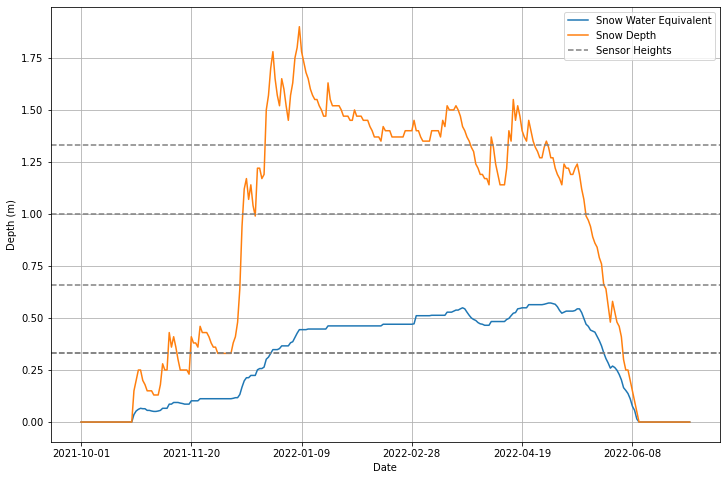

In [22]:
f, ax = plt.subplots(figsize = (12,8))
snotel[['Snow Water Equivalent','Snow Depth']].plot(ax = ax)
plt.grid()
plt.ylabel('Depth (m)')
[ax.axhline(y=i, linestyle='--', color = 'grey') for i in [0.33,0.66,1,1.33]]
ax.axhline(0.33, linestyle='--', color = 'grey', label = 'Sensor Heights')
plt.legend()
#plt.axhlines([0.33,0.66,1,1.33])
plt.savefig(join(fig_dir, 'snotel_fig.png'))

## Peak SD and date

In [19]:
snotel['Snow Depth'].max()

1.9

In [20]:
snotel.idxmax()['Snow Depth']

'2022-01-08'